# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import os
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
file_id = "1DopC7bm_EWX_ocqbOIkME9usE5rG3pZE" # ID of the file on Google Drive
file_name = 'Customer_data_2021&2022.csv'

%run download.ipynb

In [3]:
# File path
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
file_path = os.path.join(parent_dir, 'Data',file_name)

df = pd.read_csv(file_path)
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,WIN_LOSS_RATIO,MARGIN_RATE,TICKETS
0,2021-01-01,Fri,13154,67.00,1118.00,NaN,37.00,1081.00,1118.00,443.55,271.25,0.40,0.24,288
1,2021-01-01,Fri,18379,54.00,40.00,NaN,40.00,NaN,40.00,0.00,40.00,0.00,1.00,1
2,2021-01-01,Fri,559232,63.00,12.00,NaN,NaN,12.00,12.00,9.50,2.04,0.79,0.17,5
3,2021-01-01,Fri,698904,69.00,1223.50,NaN,NaN,1223.50,1223.50,267.91,245.12,0.22,0.20,40
4,2021-01-01,Fri,762921,67.00,17.50,NaN,NaN,17.50,17.50,0.00,3.50,0.00,0.20,5


In [4]:
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'], format='%Y-%m-%d')

X = df.set_index('DATE_DIM').resample('d')[['RACING_TURNOVER', 'SPORT_TURNOVER', 'FOB_TURNOVER', 'PARI_TURNOVER', 'TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS']].sum()
X = X[:365]
X

,RACING_TURNOVER,SPORT_TURNOVER,FOB_TURNOVER,PARI_TURNOVER,TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
DATE_DIM,,,,,,,,
2021-01-01,3677157.56,160587.45,1902630.00,1935115.01,3837745.01,3117143.65,611881.33,488336
2021-01-02,5912241.48,257703.55,3591432.50,2578512.53,6169945.03,4954599.14,1109035.03,698384
2021-01-03,1871370.98,336212.21,1271655.50,935927.69,2207583.19,1841094.03,324655.16,280780
2021-01-04,1207880.74,322013.93,914797.50,615097.17,1529894.67,1295588.11,197903.31,194882
2021-01-05,1257028.61,225146.21,828628.50,653546.32,1482174.82,1215165.78,251711.36,201692
...,...,...,...,...,...,...,...,...
2021-12-27,2207010.61,339157.63,1328262.13,1217906.11,2546168.24,2188043.98,308796.31,357057
2021-12-28,2430617.49,369749.27,1585460.52,1214906.24,2800366.76,2221087.54,533491.24,360986
2021-12-29,2871710.84,297848.70,1800455.20,1369104.34,3169559.54,2691991.10,423548.58,416168


Text(0.5, 1.0, '2021 TURNOVER')

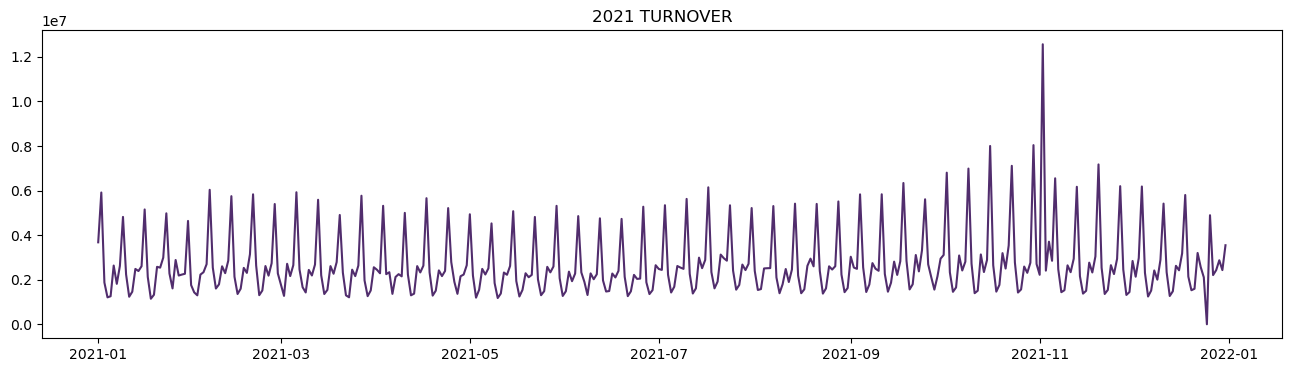

In [17]:
fig, ax = plt.subplots(1, figsize=(16,4))

ax.plot(X['RACING_TURNOVER'], color='#512d6d')
ax.set_title('2021 TURNOVER')

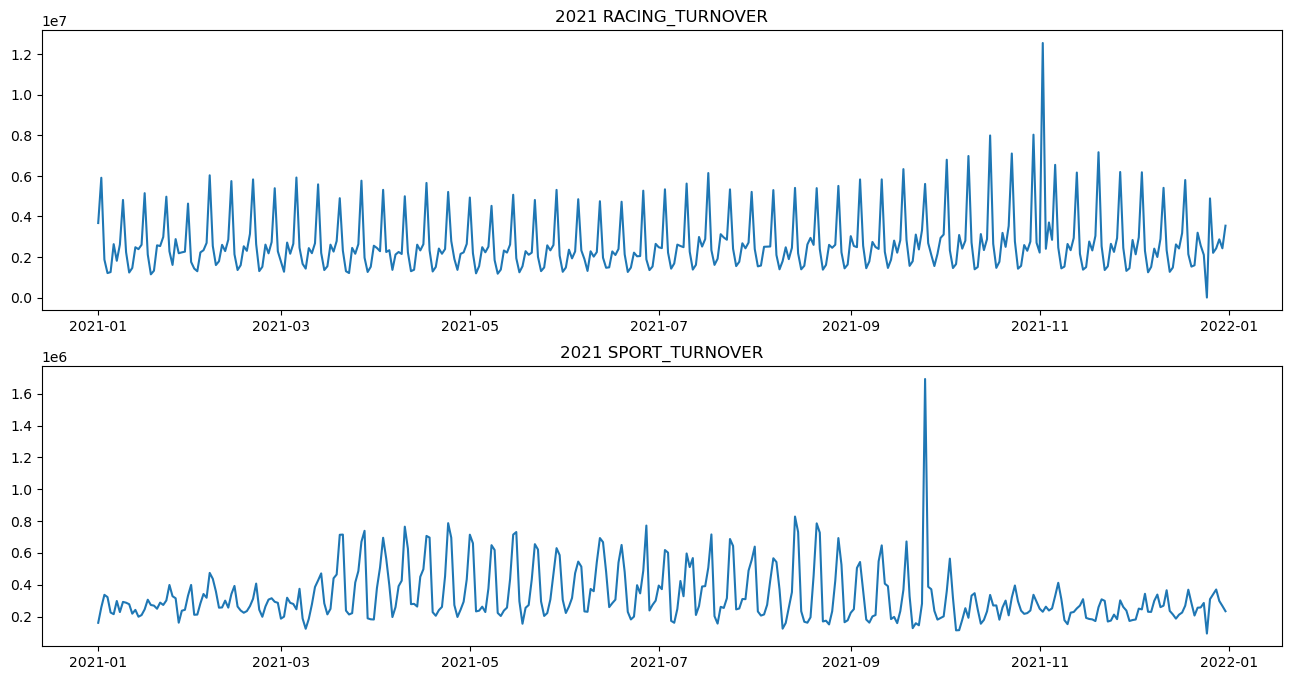

In [5]:
## 2021: RACING_TURNOVER vs SPORT_TURNOVER

fig, ax = plt.subplots(2, figsize=(16,8))

ax[0].plot(X['RACING_TURNOVER'])
ax[0].set_title('2021 RACING_TURNOVER')

ax[1].plot(X['SPORT_TURNOVER'])
ax[1].set_title('2021 SPORT_TURNOVER')

plt.show()

In [6]:
X_racing = X['RACING_TURNOVER']
X_sport = X['SPORT_TURNOVER']

# Racing

In [7]:
X_train = X_racing[:181]
X_test = X_racing[181:212]

exp_smth = ExponentialSmoothing(X_train, seasonal_periods=7, trend = "add", seasonal = "mul")
result = exp_smth.fit()

forecast = result.predict(start=X_train.index[-1] + pd.DateOffset(1), end=X_train.index[-1] + pd.DateOffset(31))

In [8]:
alpha = result.params['smoothing_level']
alpha

0.040357142857142855

In [107]:
beta = result.params['smoothing_trend']
beta

0.040357142857142855

In [108]:
gamma = result.params['smoothing_seasonal']
gamma

0.10281887755102041

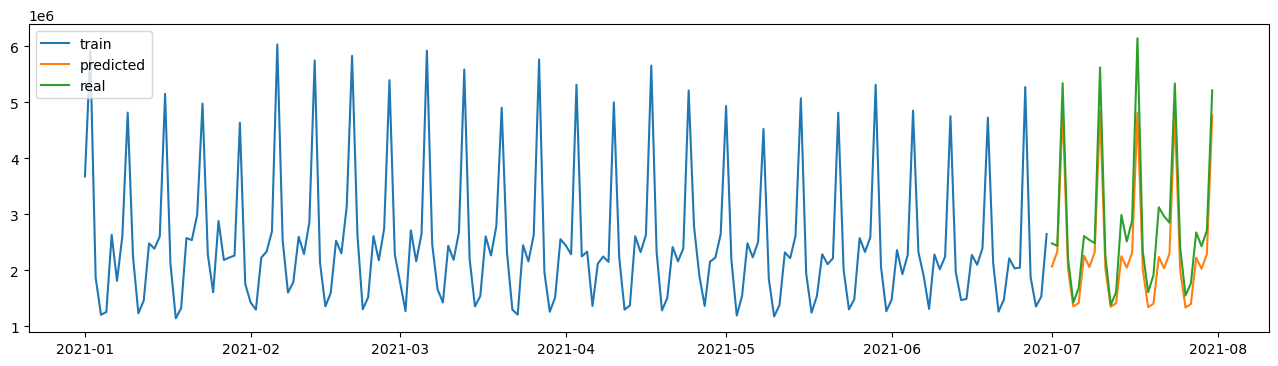

In [123]:
plt.figure(figsize=(16,4))

plt.plot(X_train)
plt.plot(forecast)
plt.plot(X_test)

plt.legend(['train', 'predicted', 'real'], loc = 'upper left')

plt.show()

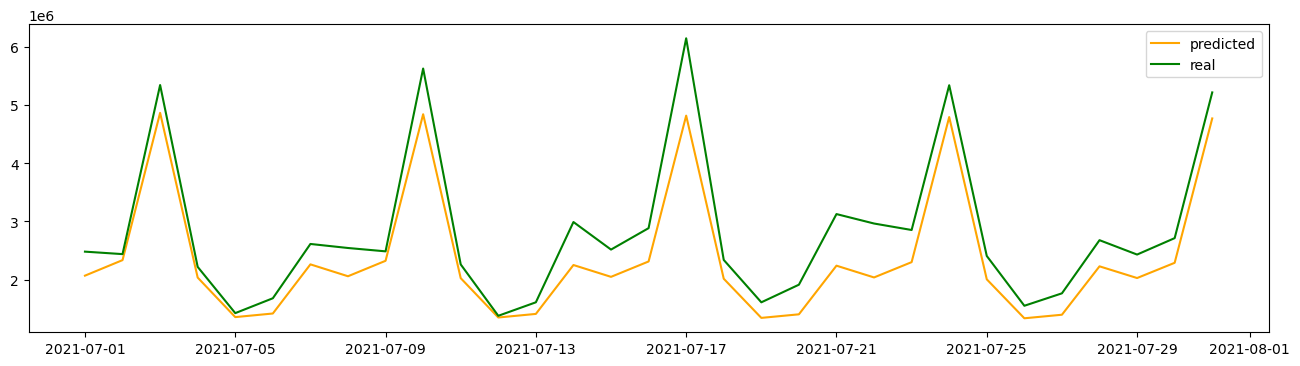

In [110]:
plt.figure(figsize=(16,4))

plt.plot(forecast, c='orange')
plt.plot(X_test, c='green', label='real')
plt.legend(['predicted', 'real'])

plt.show()

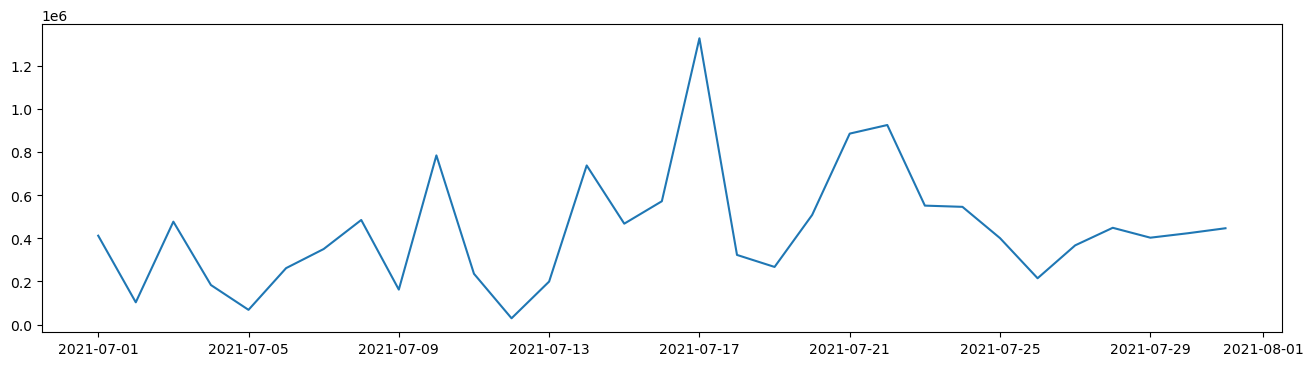

In [111]:
plt.figure(figsize=(16,4))

diff = (X_test - forecast)
plt.plot(diff)

In [112]:
MSE = np.linalg.norm(diff)/62
MSE

46267.15123521433

(-10.0, 35.0)

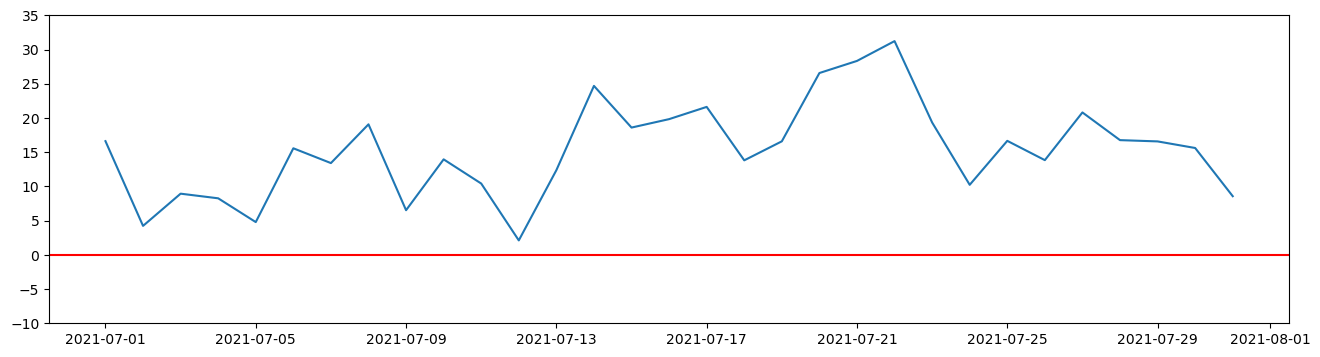

In [113]:
plt.figure(figsize=(16,4))

diff = (X_test - forecast) / X_test * 100
plt.plot(diff)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.ylim(-10,35)

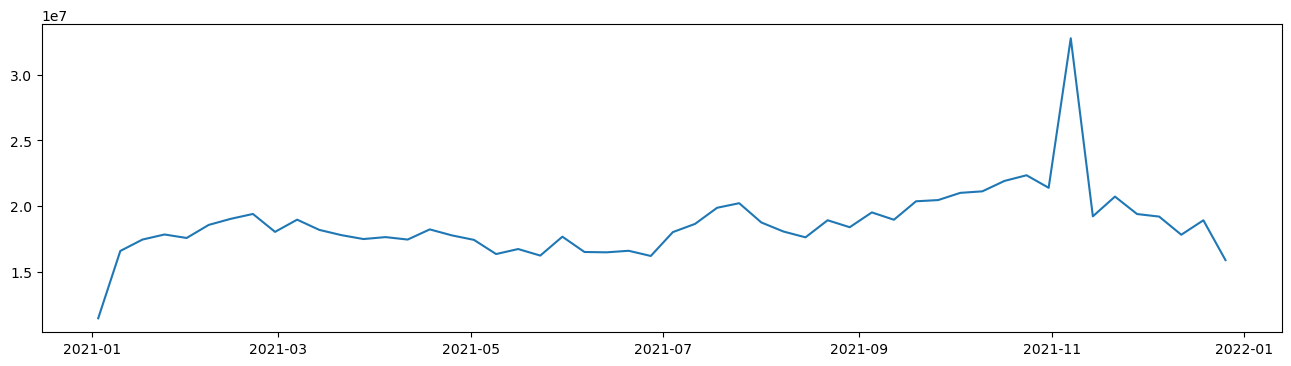

In [119]:
plt.figure(figsize=(16,4))
X = df.set_index('DATE_DIM').resample('W')['RACING_TURNOVER'].sum()
X = X[:52]
plt.plot(X)

incease in August

In [131]:
X_train = X_racing[:120]
X_test = X_racing[120:150]

exp_smth = ExponentialSmoothing(X_train, seasonal_periods=7, trend = "add", seasonal = "mul")
result = exp_smth.fit()

forecast = result.predict(start=X_train.index[-1] + pd.DateOffset(1), end=X_train.index[-1] + pd.DateOffset(30))

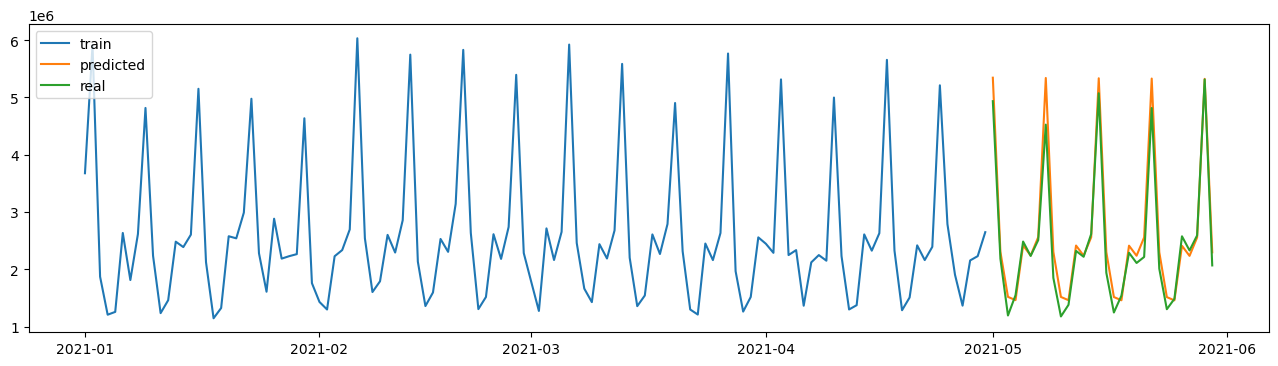

In [132]:
plt.figure(figsize=(16,4))

plt.plot(X_train)
plt.plot(forecast)
plt.plot(X_test)

plt.legend(['train', 'predicted', 'real'], loc = 'upper left')

plt.show()

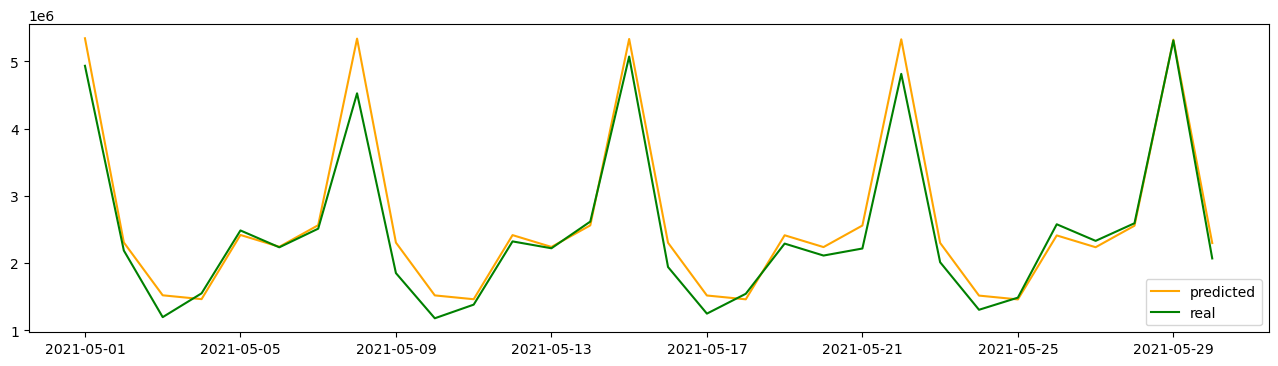

In [135]:
plt.figure(figsize=(16,4))

plt.plot(forecast, c='orange')
plt.plot(X_test, c='green', label='real')
plt.legend(['predicted', 'real'])

plt.show()

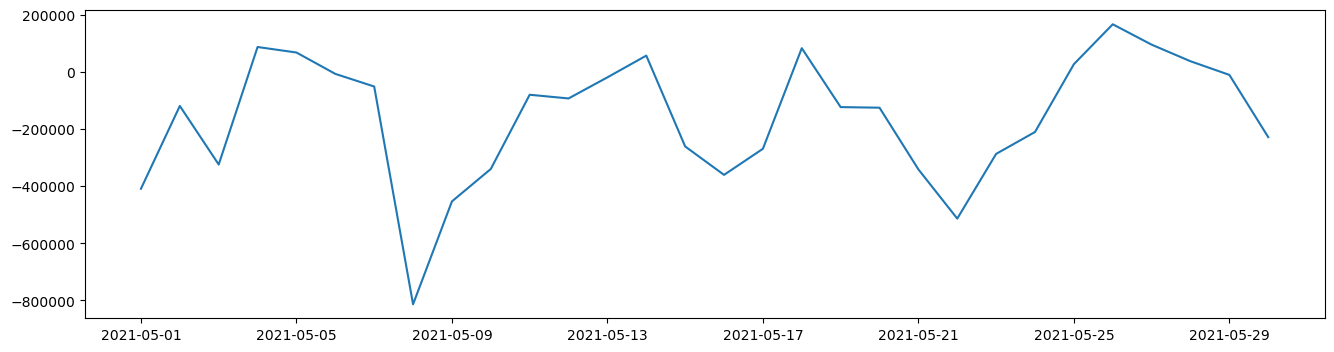

In [137]:
plt.figure(figsize=(16,4))

diff = (X_test - forecast)
plt.plot(diff)

In [138]:
MSE = np.linalg.norm(diff)/62
MSE

24012.029521833017

(-30.0, 10.0)

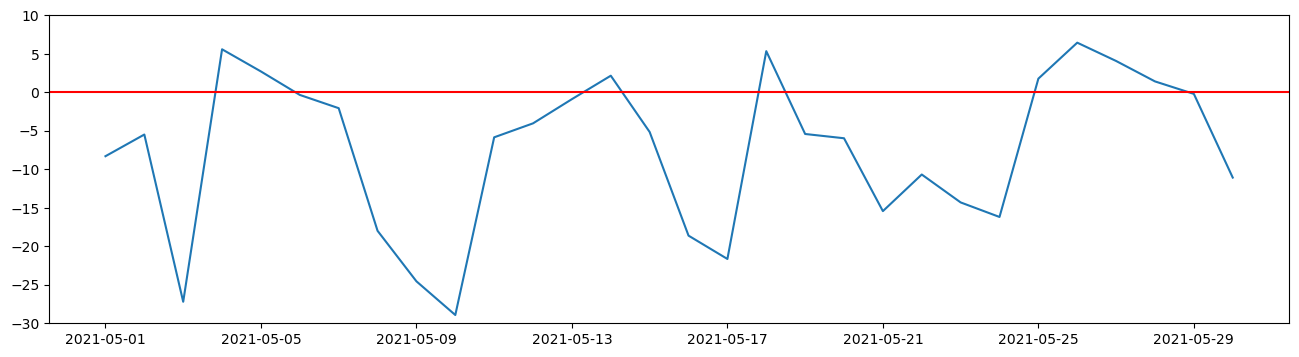

In [141]:
plt.figure(figsize=(16,4))

diff = (X_test - forecast) / X_test * 100
plt.plot(diff)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.ylim(-30,10)